# Data Exploration

# Importing and Loading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'\Users\KAYEG\Documents\ASU\FALL - 21 - Term 7\Machine Learning\Project\Project\datas\data.csv', index_col=0)

In [3]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# Summarizing Data

In [4]:
def min_max(series, operation):
    try:
        if(operation == 'min'):
            return series.min()
        return series.max()
    except TypeError:
        return 'N/A'

In [5]:
def create_overview(df):
    overview_df = pd.DataFrame()
    
    overview_df['column_name'] = df.columns
    overview_df['values'] = df.iloc[0,:].values
    overview_df['data_type'] = df.dtypes.values
    overview_df['null_count'] = df.isnull().sum().values
    overview_df['null_count_percent'] = 100 * df.isnull().sum().values /df.shape[0]
    overview_df['min_value'] = df.apply(lambda x: min_max(x, 'min')).values
    overview_df['max_value'] = df.apply(lambda x: min_max(x, 'max')).values
    print("Shape :", df.shape)
    return overview_df

### Finding if Locations are Uniqe to Every Country

In [6]:
df2 = df[['location', 'country']].sort_values(['country'])
df2[df2.duplicated()]
df2 = df2.drop_duplicates()['location']
df2[df2.duplicated()]

Series([], Name: location, dtype: int64)

# Plotting

## Result Distribution

<AxesSubplot:ylabel='Frequency'>

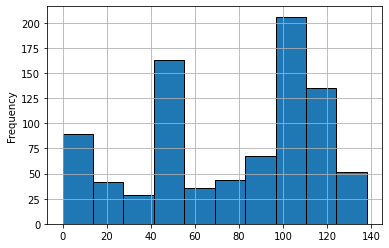

In [7]:
df['location'].plot(kind='hist', edgecolor = 'k', grid=True)

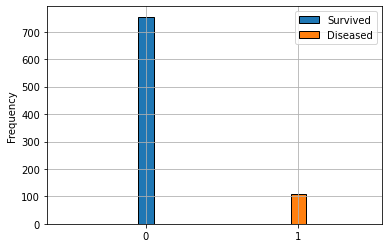

In [8]:
df[df['result'] == 0]['result'].plot(kind='hist', edgecolor='k', grid=True, align='left', label='Survived')
df[df['result'] == 1]['result'].plot(kind='hist', edgecolor='k', grid=True, align='left', label='Diseased')
plt.xticks([0, 1])
plt.legend()

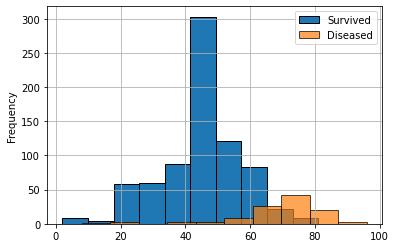

In [9]:
df[df['result'] == 0]['age'].plot(kind='hist', edgecolor='k', grid=True, label='Survived')
df[df['result'] == 1]['age'].plot(kind='hist', edgecolor='k', grid=True, alpha=0.7, label='Diseased')
plt.legend()

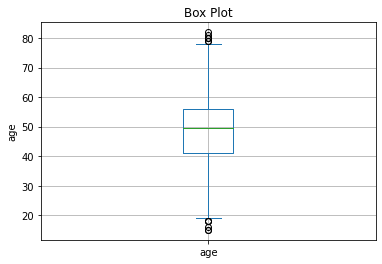

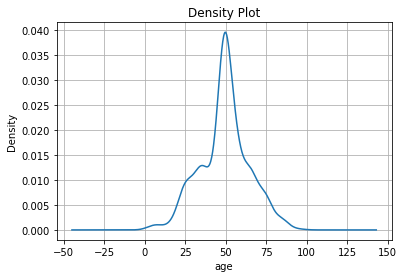

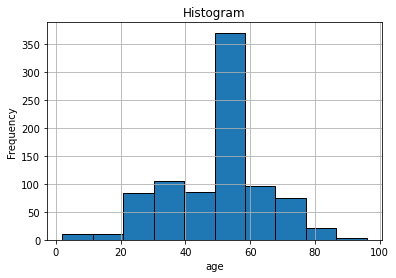

In [37]:
plt.title("Box Plot")
df[((df['age'] > 14) & (df['age'] < 83))]['age'].plot(kind='box', grid=True);
plt.ylabel("age")
plt.show()

plt.title("Density Plot")
df['age'].plot(kind='density', grid=True);
plt.xlabel('age');
plt.show()

plt.title("Histogram")
df['age'].plot(kind='hist', edgecolor = 'k', grid=True);
plt.xlabel('age');

In [42]:
df['age'].describe()

count    863.000000
mean      49.400000
std       15.079203
min        2.000000
25%       40.000000
50%       49.400000
75%       57.000000
max       96.000000
Name: age, dtype: float64

In [43]:
iqr = 57 - 40
bottom_outlier = 40 - 1.5*iqr
top_outlier = 57 + 1.5*iqr
print(bottom_outlier, iqr, top_outlier)

14.5 17 82.5


In [44]:
df[((df['age'] > 14) & (df['age'] < 83))]['age'].describe()

count    836.000000
mean      49.165311
std       13.609077
min       15.000000
25%       41.000000
50%       49.400000
75%       56.000000
max       82.000000
Name: age, dtype: float64

In [45]:
iqr = 56 - 41
bottom_outlier = 41 - 1.5*iqr
top_outlier = 56 + 1.5*iqr
print(bottom_outlier, iqr, top_outlier)

18.5 15 78.5


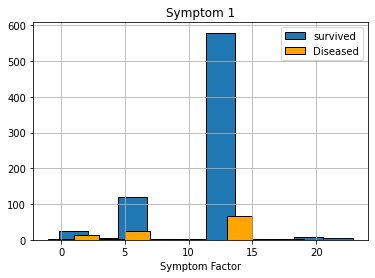

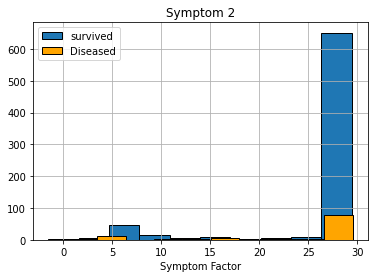

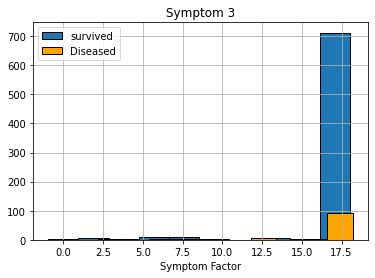

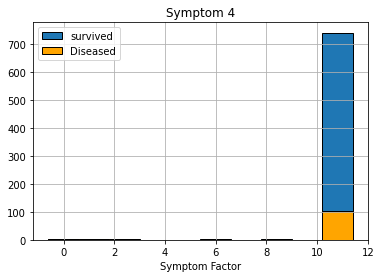

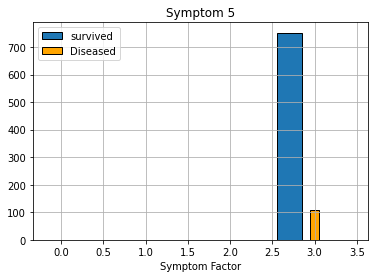

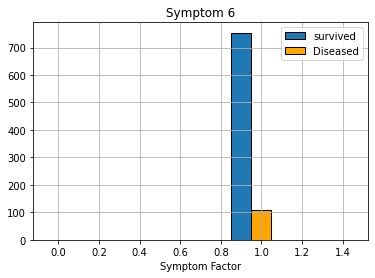

In [12]:
for i in range(1, 7):
    plt.title(f'Symptom {i}')
    df[df['result'] == 0 ][f'symptom{i}'].hist(edgecolor='k', grid=True, align = 'left', label = 'survived')
    df[df['result'] == 1 ][f'symptom{i}'].hist(edgecolor='k', align = 'left',label = 'Diseased', color='orange')
#     plt.xticks(df[f'symptom{i}'].values)
    plt.xlabel('Symptom Factor')
    plt.legend()
    plt.show()